<a href="https://colab.research.google.com/github/jootaewng/knu_bdna_2022_1801327/blob/mainhttps%2Fgithub.com%2Fjootaewng%2FREPORT/%EC%A3%BC%ED%83%9C%EC%9B%8511%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# 14회차
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [73]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


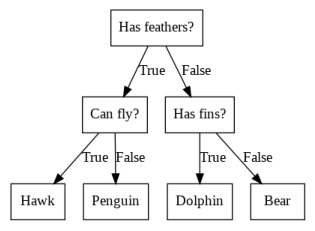

In [74]:
mglearn.plots.plot_animal_tree()

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree

In [76]:
cancer = load_breast_cancer()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [78]:
tree = DecisionTreeClassifier(random_state=0)

In [79]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.937


In [81]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [82]:
print('Training Accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test Accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

Training Accuracy: 0.988
Test Accuracy: 0.951


In [83]:
from sklearn.tree import export_graphviz

In [84]:
export_graphviz(tree, out_file='tree.dot', class_names=["0", "1"])

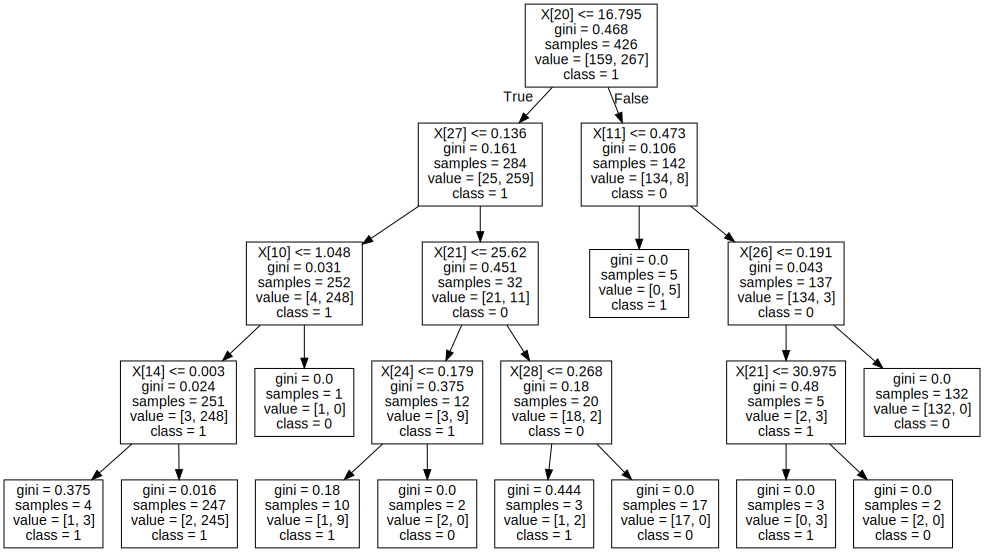

In [85]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

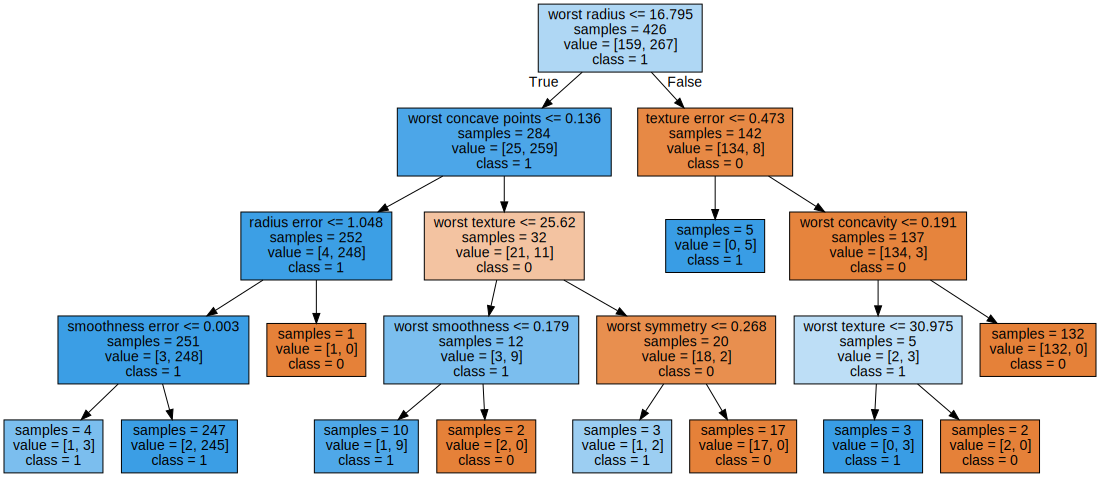

In [94]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))
export_graphviz(tree, out_file='tree.dot', class_names=["0", "1"], feature_names = cancer.feature_names, impurity = False, filled = True)

In [86]:
print("Feature Importance: \n ", tree.feature_importances_)

Feature Importance: 
  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


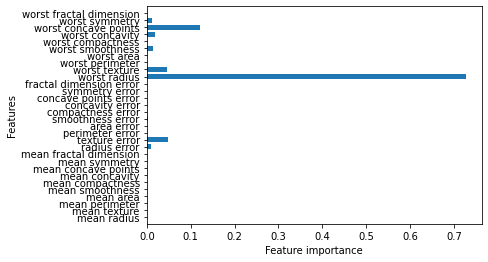

In [95]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [96]:
# 15강

In [98]:
from sklearn.datasets import load_boston

In [99]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree = DecisionTreeRegressor(random_state=0)

In [103]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

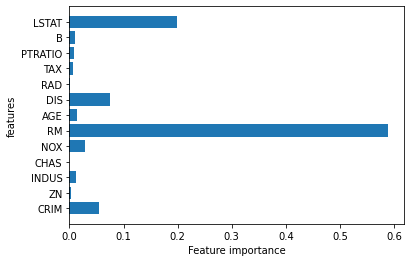

In [105]:
n_features = boston.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), boston.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('features')
plt.ylim(-1, n_features)
plt.show()

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.datasets import make_moons

In [111]:
X,y = make_moons(n_samples = 100, noise=0.25, random_state=3)
X_train, X_test, y_train ,y_test = train_test_split(X,y,stratify=y)

In [112]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [113]:
print('Training Accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test Accuracy:{:.3f}'.format(forest.score(X_test, y_test)))

Training Accuracy: 0.987
Test Accuracy:0.880


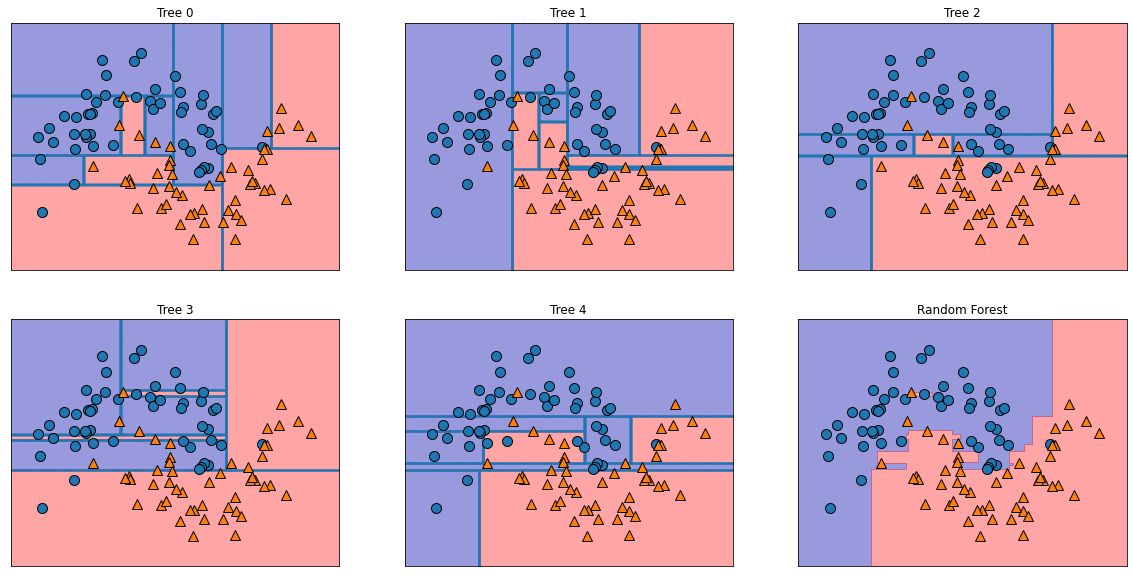

In [114]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [116]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

print('Training Accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('Test Accuracy:{:.3f}'.format(forest.score(X_test, y_test)))

Training Accuracy: 1.000
Test Accuracy:0.951


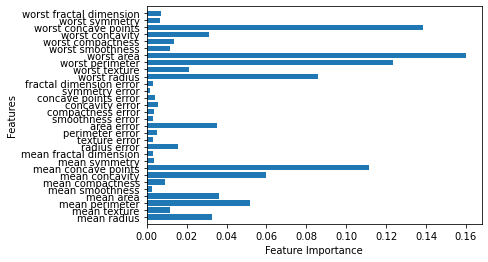

In [117]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [118]:
#16강

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.958


In [121]:
gb = GradientBoostingClassifier(max_depth=1, random_state=0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 0.995
Test Accuracy: 0.965


In [122]:
gb = GradientBoostingClassifier(max_depth=4, learning_rate=0.01, n_estimators=300, random_state=0)
gb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(gb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(gb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.944


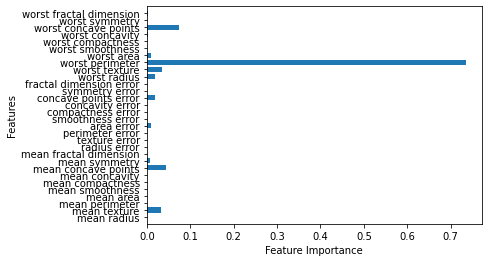

In [123]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()

In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(xgb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(xgb.score(X_test,y_test)))

Training Accuracy: 1.000
Test Accuracy: 0.965


In [129]:
xgb = XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=100, random_state=0)
xgb.fit(X_train,y_train)
print("Training Accuracy: {:.3f}".format(xgb.score(X_train,y_train)))
print("Test Accuracy: {:.3f}".format(xgb.score(X_test,y_test)))

Training Accuracy: 0.998
Test Accuracy: 0.937


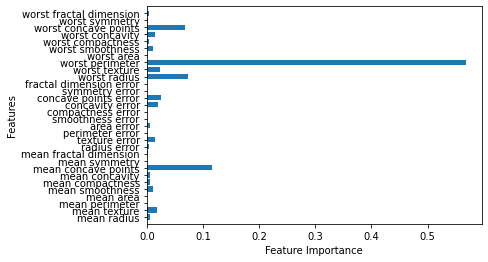

In [130]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()